In [42]:
import pandas as pd
df = pd.read_csv("Datos Limpios.csv")
df

,Genero,Edad,Bici,Estacion salida,Estacion llegada,Duracion viaje en minutos
0,F,29.0,7682701,025,008,7.53
1,F,31.0,2329670,632,635,5.85
2,M,36.0,7005978,367,439,12.05
3,F,28.0,7274376,322,028,27.73
4,M,23.0,5145545,297,202,33.58
...,...,...,...,...,...,...
10287,O,34.0,4917944,543,475,28.42
10288,M,29.0,8679474,319,378,11.70
10289,M,24.0,6433627,139,099,15.00
10290,M,35.0,6115828,040,548,19.13


Se realizara un análisis exploratorio de los datos antes de pasar a formar los grupos

In [43]:
df.isna().sum()

Genero                       0
Edad                         0
Bici                         0
Estacion salida              0
Estacion llegada             0
Duracion viaje en minutos    0
dtype: int64

In [44]:
df.dtypes

Genero                        object
Edad                         float64
Bici                           int64
Estacion salida               object
Estacion llegada              object
Duracion viaje en minutos    float64
dtype: object

In [45]:
df["Edad"] = df["Edad"].astype(int)
df["Bici"] = df["Bici"].astype(str)
df.dtypes

Genero                        object
Edad                           int64
Bici                          object
Estacion salida               object
Estacion llegada              object
Duracion viaje en minutos    float64
dtype: object

Pasaremos ahora a hacer estadisticas generales

# Estadisticas Generales

In [46]:
df1 = df.select_dtypes(include=['int64', 'float64'])

# Estadisticas Generales variables cuantitativas

In [47]:
print("estadisticas:\n" , df1.describe())
print("-"*100)

estadisticas:
                Edad  Duracion viaje en minutos
count  10292.000000               10292.000000
mean      33.003206                  13.989256
std        8.471028                   8.843144
min       16.000000                   0.630000
25%       27.000000                   7.100000
50%       32.000000                  11.720000
75%       38.000000                  18.885000
max       57.000000                  39.380000
----------------------------------------------------------------------------------------------------


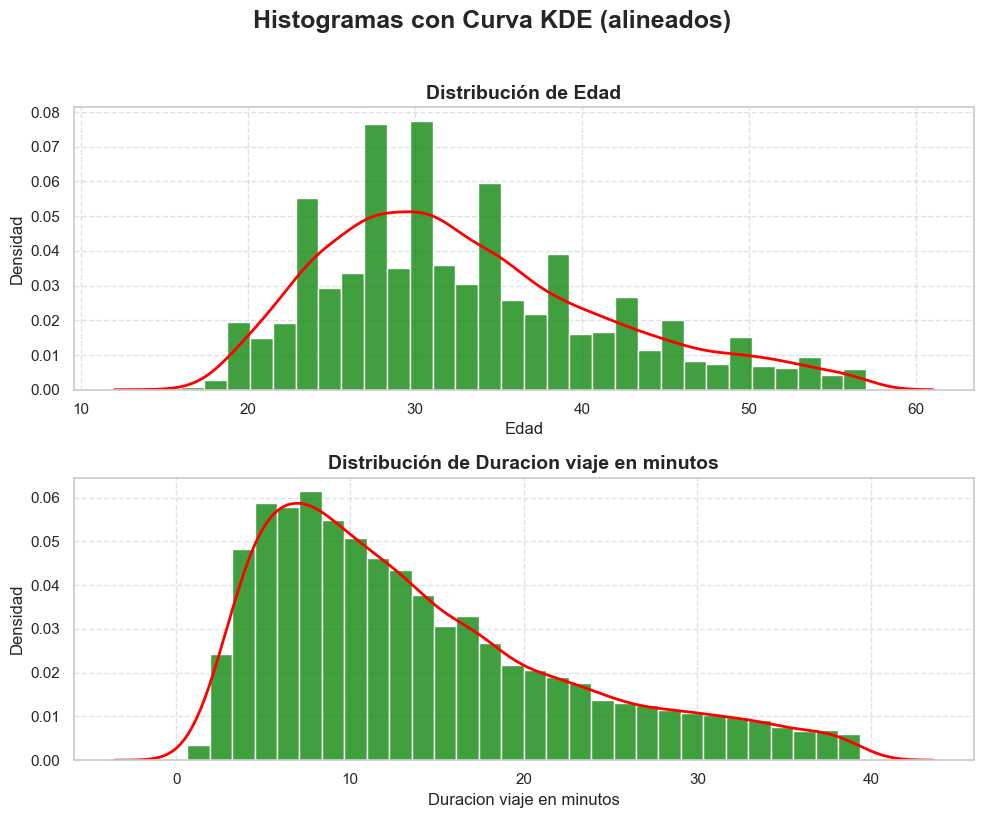

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Columnas numéricas
columnas = df1.select_dtypes(include='number').columns

# Crear figura vertical
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 4 * len(columnas)))
plt.subplots_adjust(hspace=0.5)

# Graficar cada variable numérica
for i, col in enumerate(columnas):
    ax = axes[i]
    
    # Histograma con densidad, barras verdes con borde blanco
    sns.histplot(data=df1, x=col, bins=30, color="green", edgecolor="white", stat="density", ax=ax)
    
    # Curva KDE roja alineada con la escala del histograma
    sns.kdeplot(data=df1, x=col, color="red", linewidth=2, ax=ax)

    # Personalización
    ax.set_title(f'Distribución de {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad')
    ax.grid(True, linestyle='--', alpha=0.6)

# Título general
fig.suptitle('Histogramas con Curva KDE (alineados)', fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

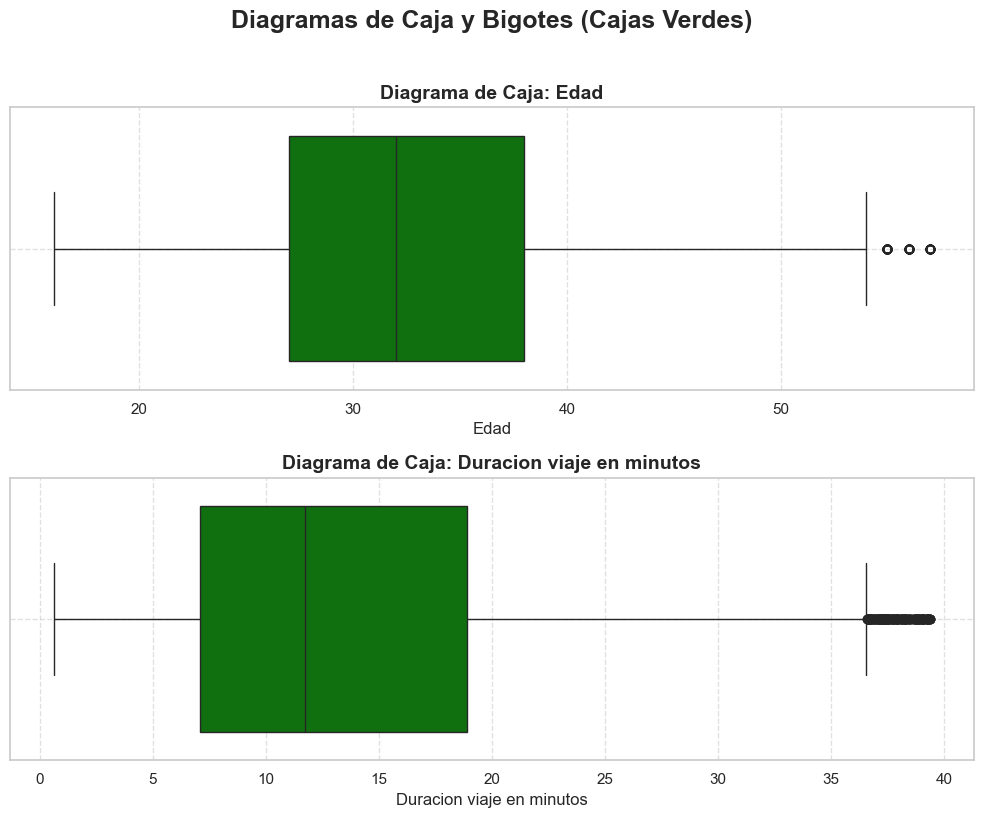

In [69]:
sns.set(style="whitegrid")

# Columnas numéricas
columnas = df1.select_dtypes(include='number').columns

# Crear figura con subplots verticales
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 4 * len(columnas)))
plt.subplots_adjust(hspace=0.5)

# Graficar cada boxplot individual
for i, col in enumerate(columnas):
    sns.boxplot(x=df1[col], ax=axes[i], color='green')  # Color verde
    axes[i].set_title(f'Diagrama de Caja: {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)  # Etiquetas del eje x en 0 grados
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Título general
fig.suptitle("Diagramas de Caja y Bigotes (Cajas Verdes)", fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

# Estadisticas Generales variables cualitativas

In [70]:
df['Genero'].value_counts()
df['Genero'].value_counts(normalize=True)

Genero
M    0.693160
F    0.285853
O    0.020987
Name: proportion, dtype: float64

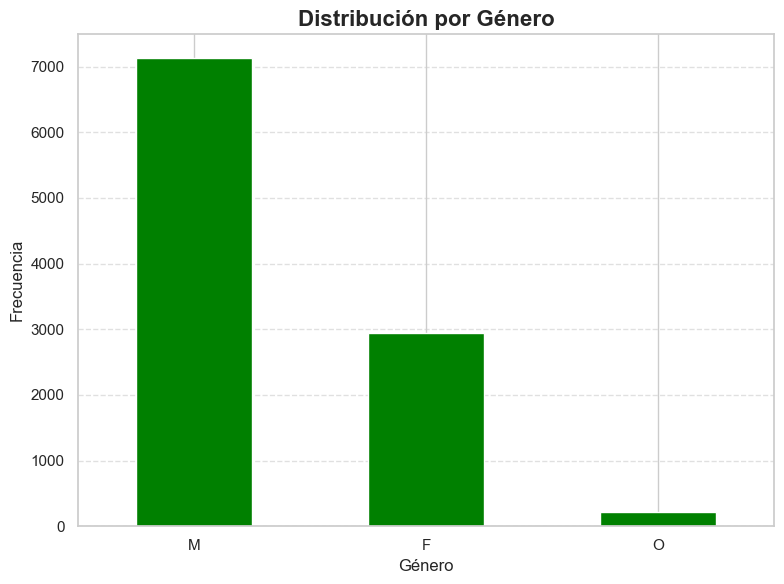

In [71]:
# Crear figura
plt.figure(figsize=(8, 6))

# Gráfico de barras con estilo mejorado
df['Genero'].value_counts().plot(kind='bar', color='green', edgecolor='white')

# Personalización
plt.title('Distribución por Género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)  # Etiquetas horizontales
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [83]:
df['Estacion llegada'].value_counts()

Estacion llegada
271-272    168
107-108     76
014         67
548         64
064         61
          ... 
666          1
690          1
701          1
488          1
661          1
Name: count, Length: 676, dtype: int64

In [84]:
df['Estacion salida'].value_counts()

Estacion salida
271-272    78
192-193    66
064        65
031        61
027        60
           ..
525         1
650         1
515         1
687         1
434         1
Name: count, Length: 677, dtype: int64

In [87]:
df2.columns

Index(['Genero', 'Bici', 'Estacion salida', 'Estacion llegada'], dtype='object')